# 🧬 Breast Cancer Diagnosis Prediction  
### Classifying Tumors as Benign or Malignant Using Machine Learning  

---

This project uses the **Breast Cancer Wisconsin (Diagnostic) Dataset** to build machine learning models that predict whether a tumor is **benign (B)** or **malignant (M)**.  

We explore multiple algorithms, perform exploratory data analysis (EDA), and evaluate model performance with metrics such as **accuracy, precision, recall, F1-score, and ROC-AUC**.  

The goal is to demonstrate how data-driven models can support medical decision-making and provide insight into which tumor characteristics are most predictive of malignancy.  

In [1]:
# Importing Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Import Machine Learning Model Packages here: 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error

In [2]:
# Loading Dataset
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Data Quality Inspection

In [3]:
# Size of the dataset
df.shape

(569, 33)

In [4]:
# Basic Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
# Check for missing values
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

# Data Pre-Processing

In [6]:
 # Dropping Unnecessary Columns
df = df.drop(['id', 'Unnamed: 32'], axis=1)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
# Endcoding the target variable
df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
# Check the class distribution 
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [9]:
# Sanity check for duplicates
df.duplicated().sum()

0

# Exploratory Data Analysis & Feature Engineering

### Basic EDA:

In [10]:
# Descriptive Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.0,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.00000
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400


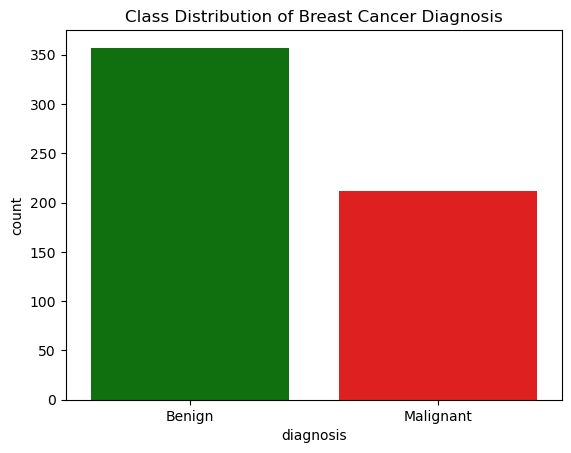

In [11]:
# Class Distribution Visualization
sns.countplot(x='diagnosis', data=df, palette=['green', 'red'])
plt.title('Class Distribution of Breast Cancer Diagnosis')
plt.xticks(ticks=[0, 1], labels=['Benign', 'Malignant'])
plt.show()

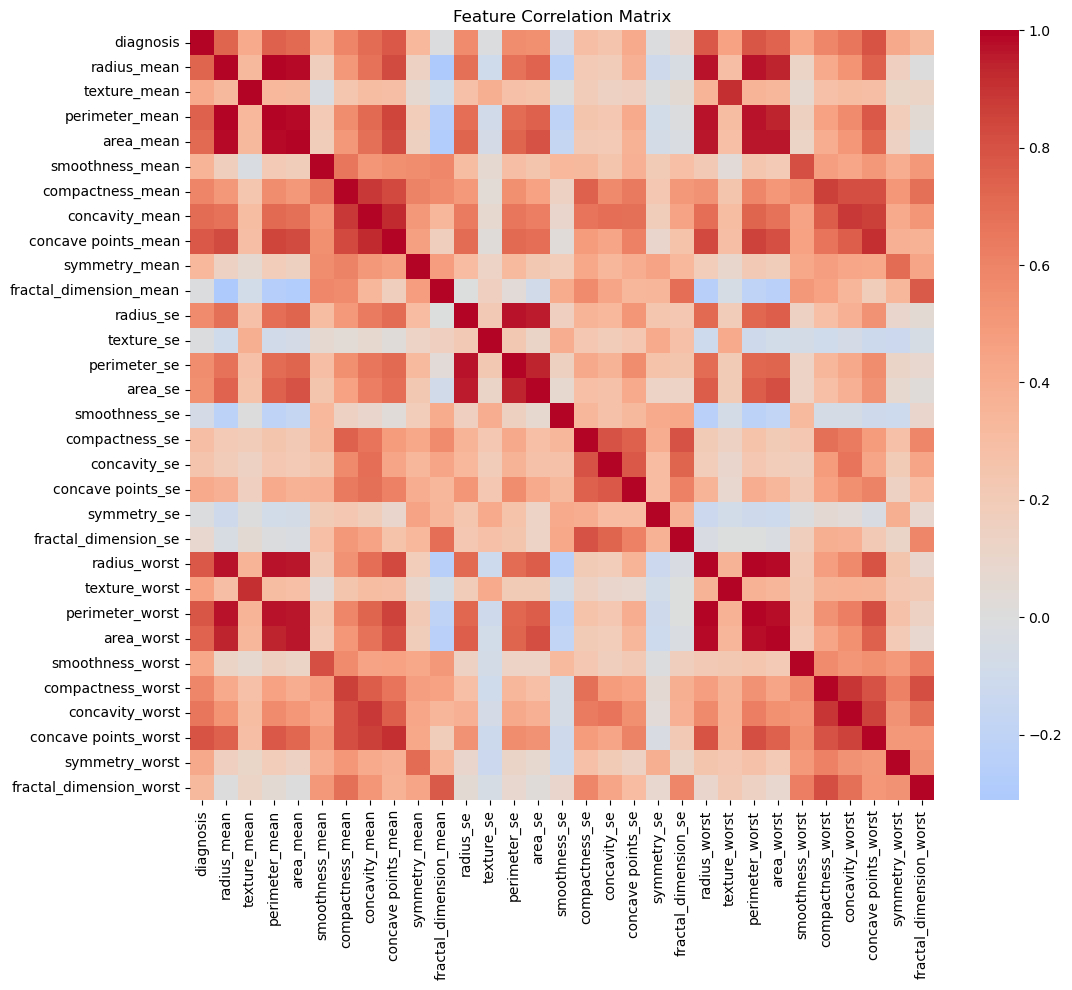

In [12]:
# Correlation Matrix 
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot = False, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()

In [13]:
# Top Correlated Features with Target
correlation_target = df.corr()['diagnosis'].abs().sort_values(ascending=False)
correlation_target.head(15)

diagnosis               1.000000
concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
area_worst              0.733825
radius_mean             0.730029
area_mean               0.708984
concavity_mean          0.696360
concavity_worst         0.659610
compactness_mean        0.596534
compactness_worst       0.590998
radius_se               0.567134
perimeter_se            0.556141
Name: diagnosis, dtype: float64

### Feature Engineering

In [14]:
# Brainstorm new feature ideas and add them here 

# Examples: 
    # radius_area_ratio = radius_mean / area_mean
    # perimeter_area_ratio = perimeter_mean / area_mean
    # concavity_points_product = concavity_mean * concave points_mean
    # smoothness_compactness_ratio = smoothness_mean / compactness_mean
    # symmetry_concavity_ratio = symmetry_mean / concavity_mean
    # texture_to_radius_ratio = texture_mean / radius_mean
    # worst_to_mean_area_rtio = area_worst / area_mean
    # fractal_dimension_perimeter_ratio = fractal_dimension_mean / perimeter_mean
    # etc.

In [15]:
# Add More Visualizations and Analysis here as Needed

# Feature Preprocessing for Machine Learning Models

In [16]:
# Splitting features and target variable
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [17]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [18]:
# Feature Scaling 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training - _ Different Algorithms

Training the following models: 

- **Logistic/Linear Regression**
- **Regularization using:**
    - Lasso (L1)
    - Ridge (L2)
    - Elastic Nets 
- **K Nearest Neighbors**
- **Decision Trees**
- **Ensemble Methods**
    - Random Forest
    - Boosting 
    - Bagging
- **Basic Neural Network**

## Logistic/Linear Regression

In [19]:
# Instantiate the Model 
lr = LogisticRegression(max_iter = 1000, fit_intercept=True)

# Fit the Model 
lr.fit(X_train_scaled, y_train)

# Make Predictions: 

# Class probabilities (positive class = 1) 
y_pred_proba = lr.predict_proba(X_test_scaled)[:, 1]

# Class labels at default threshold of 0.5 
y_pred = (y_pred_proba >= 0.5).astype(int)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=['Benign (0)', 'Malignant (1)'])
mse = mean_squared_error(y_test, y_pred_proba)    

In [20]:
# Diagnostic Outputs 
print(f'Accuracy: {accuracy:.4f}\n')
print('Confusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(class_report)
print(f'Mean Squared Error: {mse:.4f}')

Accuracy: 0.9649

Confusion Matrix:
[[71  1]
 [ 3 39]]

Classification Report:
               precision    recall  f1-score   support

   Benign (0)       0.96      0.99      0.97        72
Malignant (1)       0.97      0.93      0.95        42

     accuracy                           0.96       114
    macro avg       0.97      0.96      0.96       114
 weighted avg       0.97      0.96      0.96       114

Mean Squared Error: 0.0213


## Regularization

### Ridge Regression (L1)

### K Nearest Neighbors

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)

print(f'KNN Accuracy: {accuracy_knn:.4f}')
print('\nConfusion Matrix:')
print(conf_matrix_knn)
print('\nClassification Report:')
print(class_report_knn)

KNN Accuracy: 0.9561

Confusion Matrix:
[[71  1]
 [ 4 38]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        72
           1       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

